<a id="top"></a>
# Compute Items Mask
First:
* [Load Parameters and Items](#load)

Then choose one operation:
* [Compute and Save](#compute)
* [Statistics](#statistics)
* [Plot Item Files](#plot)
* [Computing Test](#test)

## Load Parameters and Items<a id="load"></a>

In [1]:
import json
from utils import load_items

with open('parameters.json', 'r') as infile:
    params = json.load(infile)

RESIZE_X = params['resize']['x']
RESIZE_Y = params['resize']['y']
ITEM_FOLDER = params['item_folder']
BACKGROUND_THRESHOLD = params['background_threshold']

items = load_items(ITEM_FOLDER)

## Compute and Save<a id="compute"></a>

Issues:
* make a version for items with holes, e.g.:
  * fiskars_scissors
  * duct_tape
  * ...

In [ ]:
import cv2, glob
from utils import imread_rgb, item_mask

def worker(item):
        folder = ITEM_FOLDER + '/' + item + '/'
        files = glob.glob(folder + '*.png')
        for filename in files:
            image_RGB = imread_rgb(filename)
            if not image_RGB is None:
                image_RGB = cv2.resize(image_RGB,(RESIZE_X,RESIZE_Y))
                mask = item_mask(image_RGB, BACKGROUND_THRESHOLD)
                cv2.imwrite(filename[:-4]+'_mask.pgm', mask)

In [ ]:
%%time
from multiprocessing import Pool

print('Computing mask of images')
print('* resized to %d x %d' % (RESIZE_X,RESIZE_Y))
print('* background threshold %d' % (BACKGROUND_THRESHOLD))
pool_size = 6
pool = Pool(pool_size)
result = []
for item in items:
    result.append( pool.apply_async(worker, (item,)) )
pool.close()
pool.join()
for r in result:
     r.get()

[Top](#top)

## Statistics<a id="statistics"></a>

In [2]:
import cv2, glob, numpy as np
from utils import imread_gray

item_view = []
area = []
for item in items:
    folder = ITEM_FOLDER + '/' + item + '/'
    files = glob.glob(folder + '*_mask.pgm')
    for filename in files:
        mask = imread_gray(filename)
        if not mask is None:
            item_view.append(filename)
            area.append( np.sum(mask==255) )

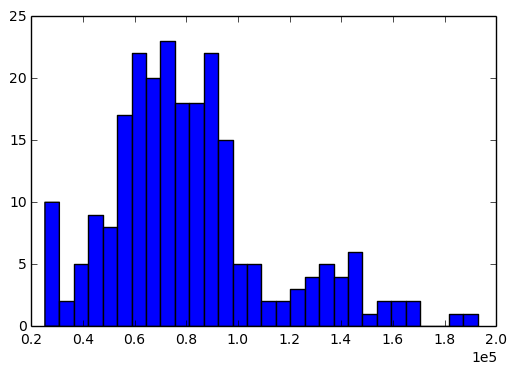

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(area,bins=30); plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));

In [4]:
[(a, str(iv.split('/')[-1][:-9])) for a, iv in sorted(zip(area,item_view), reverse=True) if a>160000]

[(192870, 'robots_everywhere_top_01'),
 (185258, 'robots_everywhere_bottom_01'),
 (165758, 'bath_sponge_bottom_01'),
 (165429, 'pie_plates_top_01'),
 (164299, 'balloons_bottom_01'),
 (160101, 'avery_binder_bottom_01')]

In [5]:
[(a, str(iv.split('/')[-1][:-9])) for a, iv in sorted(zip(area,item_view), reverse=True) if a<30000]

[(29613, 'measuring_spoons_bottom-side_02'),
 (29357, 'plastic_wine _glass_top_01'),
 (29336, 'measuring_spoons_top-side_02'),
 (27554, 'fiskars_scissors_top-side_01'),
 (27123, 'measuring_spoons_top-side_01'),
 (26903, 'fiskars_scissors_bottom-side_01'),
 (26369, 'toilet_brush_bottom_01'),
 (25713, 'toilet_brush_top_01'),
 (25270, 'fiskars_scissors_top-side_02')]

[Top](#top)

## Plot Item Files<a id="plot"></a>

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import cv2, numpy as np
from ipywidgets import interact
from utils import imread_rgb, imread_gray

def load_and_plot(item,view):
    prefix = ITEM_FOLDER + '/' + item + '/' + item + '_' + view
    filename = prefix + '.png'
    image_RGB = imread_rgb(filename)
    if not image_RGB is None:
        image_RGB = cv2.resize(image_RGB,(RESIZE_X,RESIZE_Y))
        plt.subplot(121); plt.imshow(image_RGB); plt.axis('off');
        filename = prefix + '_mask.pgm'
        mask = imread_gray(filename)
        if not mask is None:
            area = np.sum(mask==255) 
            print('Area: %d' % area)
            plt.subplot(122); plt.imshow( mask,cmap='gray'); plt.axis('off');

Area: 85464


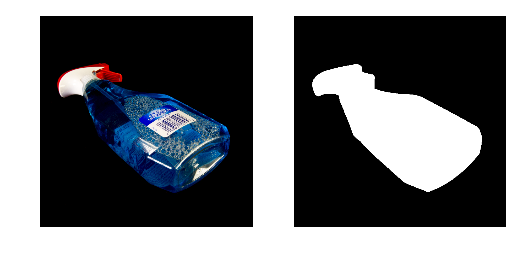

In [8]:
views = ['top_01','top-side_01','top-side_02','bottom_01','bottom-side_01','bottom-side_02']
interact(load_and_plot,item=items,view=views);

### Plot All Items

In [ ]:
for item in items:
    for view in views:
        print(item + '_' + view)
        load_and_plot(item,view)
        plt.show()

[Top](#top)

## Computing Test<a id="test"></a>

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import cv2, numpy as np
from ipywidgets import interact
from utils import imread_rgb, item_mask

def compute_and_plot(item,view):
    prefix = ITEM_FOLDER + '/' + item + '/' + item + '_' + view
    filename = prefix + '.png'
    image_RGB = imread_rgb(filename)
    if not image_RGB is None:
        image_RGB = cv2.resize(image_RGB,(RESIZE_X,RESIZE_Y))
        mask = item_mask(image_RGB, BACKGROUND_THRESHOLD)
        plt.subplot(121); plt.imshow(image_RGB); plt.axis('off');
        plt.subplot(122); plt.imshow(mask,cmap='gray'); plt.axis('off')
        area = np.sum(mask==255)
        print('Area: %d pixels' % area)

In [ ]:
views = ['top_01','top-side_01','top-side_02','bottom_01','bottom-side_01','bottom-side_02']
interact(compute_and_plot,item=items,view=views);

### Compute and Plot All Items

In [ ]:
for item in items:
    for view in views:
        print(item + '_' + view)
        compute_and_plot(item,view)
        plt.show()

[Top](#top)